In [24]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math

psi1 = Statevector([math.cos(math.pi / 8), math.sin(math.pi / 8)])
psi2 = Statevector([math.cos(5 * math.pi / 8), math.sin(5 * math.pi / 8)])

# When given a Statevector input, the Operator function returns the outer
# product of that state vector with itself — or, in other words, the
# product of the vector times its conjugate transpose.

H = Operator(psi1) - Operator(psi2)

display(array_to_latex(H))

<IPython.core.display.Latex object>

In [25]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7  # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw())

░ ┌───┐          ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─■────────┤ H ├─░─┤M├
     ┌───┐ ░ └───┘ │P(7π/5) └───┘ ░ └╥┘
q_1: ┤ X ├─░───────■──────────────░──╫─
     └───┘ ░                      ░  ║ 
c: 1/════════════════════════════════╩═
                                     0

In [26]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

C:\Users\nihar\AppData\Local\Temp\ipykernel_11372\1644269935.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  display(Sampler().run(qc).result().quasi_dists[0])


{0: np.float64(0.345491502812526), 1: np.float64(0.654508497187474)}

In [27]:
display({   # Calculate predicted results
    0: cos(pi * theta) ** 2,
    1: sin(pi * theta) ** 2
})

{0: 0.34549150281252616, 1: 0.6545084971874737}

In [28]:
from math import pi
from qiskit import QuantumCircuit

theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * (2 * theta), 1, 2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw())

░ ┌───┐ ░                       ░    ┌───┐                ░ ┌─┐   
q_0: ──────░─┤ H ├─░──■────────────────────░──X─┤ H ├─■──────────────░─┤M├───
           ░ ├───┤ ░  │                    ░  │ └───┘ │P(-π/2) ┌───┐ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├─░──┼─────────■──────────░──X───────■────────┤ H ├─░──╫─┤M├
     ┌───┐ ░ └───┘ ░  │P(7π/5)  │P(14π/5)  ░                   └───┘ ░  ║ └╥┘
q_2: ┤ X ├─░───────░──■─────────■──────────░─────────────────────────░──╫──╫─
     └───┘ ░       ░                       ░                         ░  ║  ║ 
c: 2/═══════════════════════════════════════════════════════════════════╩══╩═
                                                                        0  1

C:\Users\nihar\AppData\Local\Temp\ipykernel_11372\3145071669.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(qc).result()


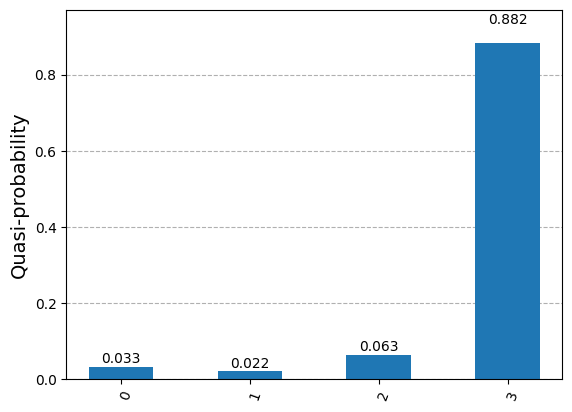

In [29]:
from qiskit.visualization import plot_histogram

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [30]:
from qiskit.circuit.library import QFT

display(QFT(4).decompose().draw())

┌───┐»
q_0: ──────────────────────────────────────■─────────────■────────■───────┤ H ├»
                                           │       ┌───┐ │        │P(π/2) └───┘»
q_1: ────────────────────■────────■────────┼───────┤ H ├─┼────────■─────────X──»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)            │  »
q_2: ──────■───────┤ H ├─┼────────■────────┼─────────────■──────────────────X──»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                             »
q_3: ┤ H ├─■─────────────■─────────────────■───────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

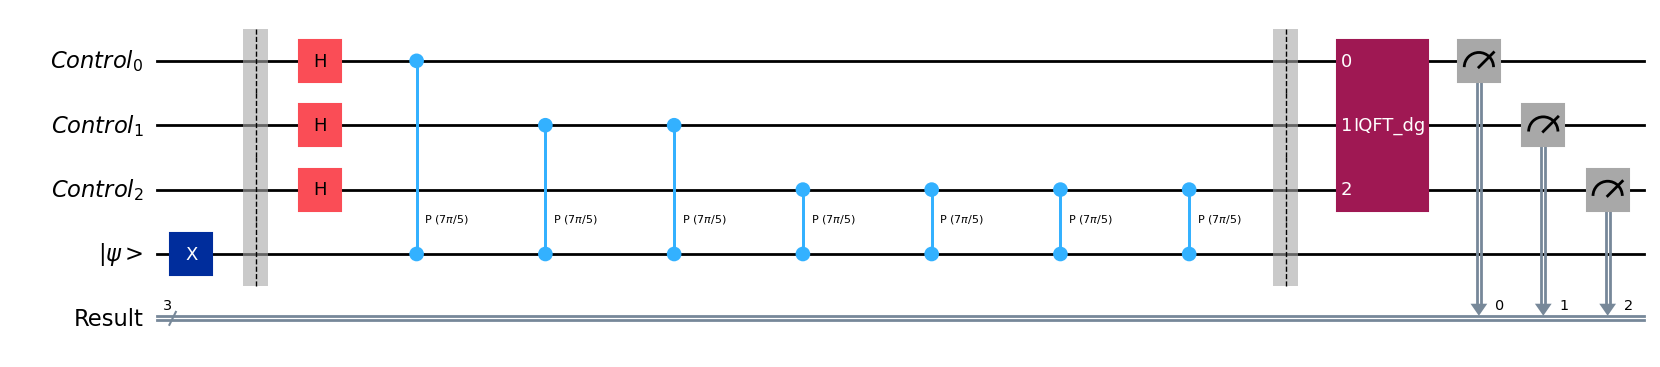

In [40]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = 0.7
m = 3  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw('mpl'))

C:\Users\nihar\AppData\Local\Temp\ipykernel_11372\1768351024.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(qc).result()


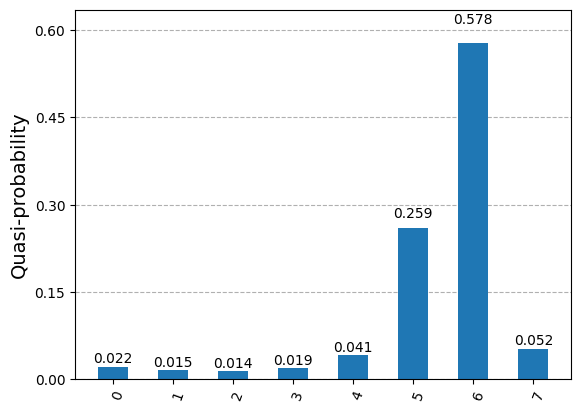

In [32]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [33]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 6
Estimated theta: 0.75


In [34]:
N = 21
a = 17
max_power = 12

print("k \t a^k \n")
for k in range(1, max_power + 1):
    print(
        "%2d \t %2d" % (k, a**k % N)
    )  # The % operation computes the remainder modulo N

k 	 a^k 

 1 	 17
 2 	 16
 3 	 20
 4 	  4
 5 	  5
 6 	  1
 7 	 17
 8 	 16
 9 	 20
10 	  4
11 	  5
12 	  1


In [35]:
N = 21
a = 18
max_power = 12

print("k \t a^k \n")
for k in range(1, max_power + 1):
    print("%2d \t %2d" % (k, a**k % N))

k 	 a^k 

 1 	 18
 2 	  9
 3 	 15
 4 	 18
 5 	  9
 6 	 15
 7 	 18
 8 	  9
 9 	 15
10 	 18
11 	  9
12 	 15


In [36]:
def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

In [37]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True,
            )

    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

In [38]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)
display(psi_prep.draw())

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────

In [39]:
from fractions import Fraction
from math import gcd

a = 8
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    phase = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a ** (r // 2) - 1, N)
        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True


Attempt 1


C:\Users\nihar\AppData\Local\Temp\ipykernel_11372\2139659180.py:45: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]


Non-trivial factor found: 3
